<a href="https://colab.research.google.com/github/fabnancyuhp/RENDUPYTHONISFSTAT/blob/master/KMEANS_ET_CAH_ETUDIANT_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice mélange de loi

1/ Simuler un mélange de loi de taille 1000. Ce mélange de loi aura 3 lois. Chaque loi sera simulé par des vecteurs gaussiens de dimention 2. Les moyennes de ces classes sont respectivement (1,1), (3,3), (5,5). Les covarainces de ces 3 classes sont des matrices diagonales avec des 1. La probabilité d'apparition de ces classes est respectivement 1/4,1/4,1/2. Ce mélange deloi sera stocke dans MIX_DATA. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#1
MIX_DATA = np.ones((1000,2))

cat1 = np.random.multivariate_normal(mean=np.array([1,1]),cov=np.diag([1,1]),size=1000)
cat2 = np.random.multivariate_normal(mean=np.array([3,3]),cov=np.diag([1,1]),size=1000)
cat3 = np.random.multivariate_normal(mean=np.array([5,5]),cov=np.diag([1,1]),size=1000)

cat = np.random.choice(a=[1,2,3],size=1000,replace=True,p=[1/4,1/4,1/2])

MIX_DATA[cat==1] = cat1[cat==1]
MIX_DATA[cat==2] = cat2[cat==2]
MIX_DATA[cat==3] = cat3[cat==3]


In [0]:
#cat = np.random.choice(a=[1,2,3],size=1000,replace=True,p=[1/4,1/4,1/2])
#n1 = len(cat==1)
#cat1 = np.random.multivariate_normal(mean=np.array([1,1]),cov=np.diag([1,1]),size=n1)
#n2 = len(cat==2)
#cat2 = np.random.multivariate_normal(mean=np.array([3,3]),cov=np.diag([1,1]),size=n2)

#TOT = np.vstack([cat1,cat2])
#np.random.shuffle(TOT)

In [0]:
#init = []
#cat = np.random.choice(a=[1,2,3],size=1000,replace=True,p=[1/4,1/4,1/2])
#for i in cat:
#    if i==1:
#        vect = np.random.multivariate_normal(mean=np.array([1,1]),cov=np.diag([1,1]),size=1)
#        init.append(vect) #init = vstack([init,vect])
#    if i==2:
#        vect = np.random.multivariate_normal(mean=np.array([3,3]),cov=np.diag([1,1]),size=1)
#        init.append(vect)
#    if i==3:
#        vect = np.random.multivariate_normal(mean=np.array([5,5]),cov=np.diag([1,1]),size=1)
#        init.append(vect)    
#np.array([init]).reshape(1000,2) 

2/ En vous inspirant de l'exemple ci_dessus appliquer la régle du coude pour déterminer le nombre de cluster optimum.

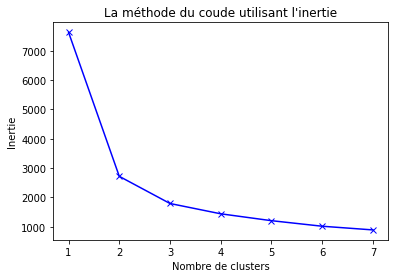

In [0]:
#2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

TOT_scal = StandardScaler().fit_transform(MIX_DATA)

inertia = []

nb_clus = range(1,8)
for k in nb_clus:
    kmeanmodel = KMeans(n_clusters=k,max_iter=1000,n_init=50).fit(MIX_DATA)
    inertia.append(kmeanmodel.inertia_)    
nb_clus = range(1,8)
plt.plot(nb_clus,inertia,'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title("La méthode du coude utilisant l'inertie")
plt.show()

3/ Fait un kmean à 3 classes sur les données MIX_DATA. 

In [0]:
#3
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3,max_iter=20000,n_init=1000)
kmean.fit(MIX_DATA)

Y_pred = kmean.fit_predict(MIX_DATA)





4/ Faite une représentation mettant en évidence les 3 classes. (on utilise pas le TSNE). Vous devez obtenir un graphique semblable à celui ci-dessous.

<function matplotlib.pyplot.show(*args, **kw)>

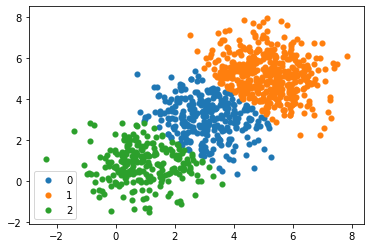

In [0]:
import numpy as np

import matplotlib.pyplot as plt

for o in np.unique(Y_pred):
    plt.scatter(MIX_DATA[:,0][Y_pred==o], MIX_DATA[:, 1][Y_pred==o], label=o,lw=0.1)
plt.legend(loc=3)
plt.show

5/Faite une représentation mettant en évidence les pattern produits par le modèle kmeans de la question 3.

<function matplotlib.pyplot.show(*args, **kw)>

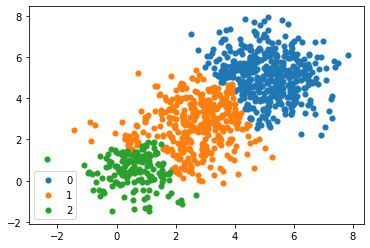

In [0]:
from sklearn.cluster import AgglomerativeClustering

#on peut utiliser les différent linkage: “ward”, “complete”, “average”, “single”
CAH = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
clustering = CAH.fit(MIX_DATA)
clusteringbis = CAH.fit_predict(MIX_DATA)

+
Y_pred = clustering.labels_

import numpy as np
import matplotlib.pyplot as plt

for o in np.unique(Y_pred):
    plt.scatter(MIX_DATA[:,0][Y_pred==o], MIX_DATA[:, 1][Y_pred==o], label=o,lw=0.1)
plt.legend(loc=3)
plt.show

6/ Faire classification hiérarchique à 3 classes. Représenter les données mettant en évidence les classes de la CAH.

<function matplotlib.pyplot.show(*args, **kw)>

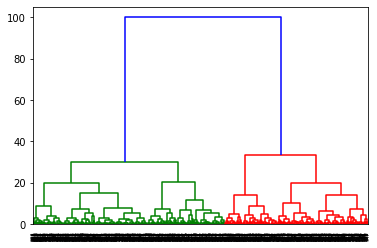

In [0]:
from sklearn.cluster import AgglomerativeClustering

#on peut utiliser les différent linkage: “ward”, “complete”, “average”, “single”
CAH = AgglomerativeClustering(n_clusters=10, affinity='euclidean',linkage='ward')
clustering = CAH.fit(MIX_DATA)
clusteringbis = CAH.fit_predict(MIX_DATA)

clustering.labels_

from scipy.cluster import hierarchy
Z = hierarchy.linkage(MIX_DATA, method='ward',metric='euclidean')

plt.figure()
dn = hierarchy.dendrogram(Z)
plt.show

# Exercice sur données lettres
Dans cet exercice on va appliquer les algorithmes Kmeans et CAH sur des images représentants des lettres. Chaques image est modélisé par une matrice 28x28=784 pixels. Chaque pixel représente un niveau de gris. (dans le cas d'image en couleur on a 3 couche de pixel: une couche rouge, une couche verte, une couche bleu. 

 1/ importation image : dataset 
* Pour importer les images et les transformer on objet numpy on utilise matplotlib.pyplot.imread.
* Pour afficher une image on utilise matplotlib.pyplot.imread.imshow.
* La fonction numpy.ravel() permet d'applatire un vecteur.
Ci-dessous im1 représente l'image sous forme de matrice

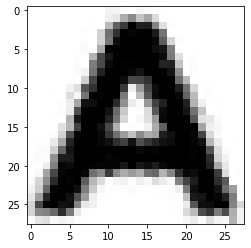

In [0]:
import matplotlib.pyplot as plt
im1 = plt.imread('https://raw.githubusercontent.com/qizheng3/Synthetic-Images-GANs/master/data/notMNIST_small/A/MDEtMDEtMDAudHRm.png')
plt.imshow(im1, cmap='binary')
plt.show()

In [0]:
im1.shape

(28, 28)

Ici im1bis est le vecteur représentant l'image. Il vient de la matrice im1 que l'on a applati.  

In [0]:
im1bis = im1.ravel()
im1bis.reshape(784,1).T


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04705882, 0.04313726, 0.00392157, 0.        , 0.03529412,
        0.01960784, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.05882353, 0.09019608,
        0.32156864, 0.45490196, 0.23921569, 0.34901962, 0.14117648,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.27450982, 0.61960787, 0.76862746, 1.        ,
        0.87058824, 0.8862745 , 0.4862745 , 0.12

Vous devez télécharger les données suivantes: https://1drv.ms/u/s!Am09h0q2OIX0bzaaz8qoN9suO8U?e=KeVWxS. Ces données sont un ensembles de 2800 images environ. Il faut décompresser ce fichier et placer placer le résultat dans un répétoire vide image.

Transformer toutes les images du répétoire IMAGE en des vecteurs du type im1bis. Ensuite à partire de ces vecteurs faire une matrice dont chaque ligne est un vecteur de taille 784 représentant une image. Cette matrice sera stocke dans X_image_vect.

In [0]:
import os

images = os.listdir("C:/Users/user/Documents/machine learning/image")
images = ["C:/Users/user/Documents/machine learning/image/"+o for o in images]
X_image_vect= plt.imread(images[0]).ravel().reshape(784, 1).T
for i in range (1,len (images)):
    X_image_vect=np.vstack((X_image_vect, plt.imread(images[i]).ravel().reshape(784, 1).T))

X_image_vect.shape

(2800, 784)

2/Appliquer une regle du coude pour déterminer le nombre de classe optimum. Dans la suite on admettra que le nombre optimum de classe est 4. On oublira pas de mettre à l'echelle les données (StandardScaler()).

On fait ensuite le graphe du coude:

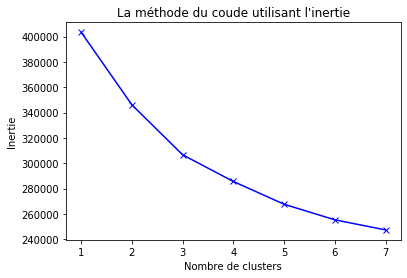

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

TOT_scal = StandardScaler().fit_transform(X_image_vect)

inertia = []

nb_clus = range(1,8)
for k in nb_clus:
    kmeanmodel = KMeans(n_clusters=k,max_iter=1000,n_init=50).fit(X_image_vect)
    inertia.append(kmeanmodel.inertia_)    
nb_clus = range(1,8)
plt.plot(nb_clus,inertia,'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title("La méthode du coude utilisant l'inertie")
plt.show()


3/Représenter les données X_image_vect à l'aide dun TSNE à 2 composantes. On utilise les données X_image_vect.

In [0]:
from sklearn.manifold import TSNE
t_sne = TSNE(n_components=2,random_state=1998)

X_projbis = t_sne.fit_transform(X_image_vect)
X_projbis[0:2]



array([[-31.720978  ,  -0.67544955],
       [-61.917202  ,   2.5230238 ]], dtype=float32)

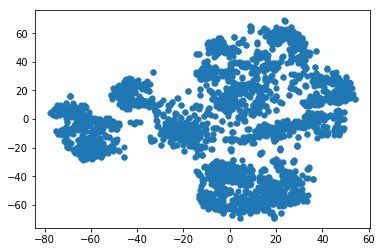

In [0]:
import matplotlib.pyplot as plt
plt.scatter(X_projbis[:,0],X_projbis[:,1],color='black',alpha=6/11,label='0')

plt.show()

4/Faite un kmeans dont le nombre de cluster est 4. Ce modele s'appelle kmean4. Il faut entrainer ce modele. Ensuite afficher kmean4.labels

In [0]:
from sklearn.cluster import KMeans

kmean4 = KMeans(n_clusters=4,max_iter=20000,n_init=1000)
kmean4.fit(X_projbis)

Y_pred = kmean4.fit_predict(X_projbis)




5/ Représenter les données avec leurs labels en utilisant un TSNE. Une couleur par label.

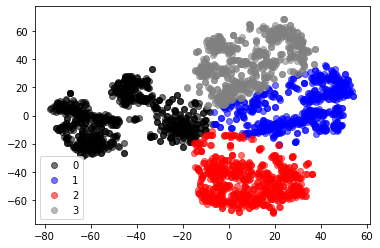

In [0]:
import matplotlib.pyplot as plt
plt.scatter(X_projbis[:,0][Y_pred==0],X_projbis[:,1][Y_pred==0],color='black',alpha=6/11,label='0')
plt.scatter(X_projbis[:,0][Y_pred==1],X_projbis[:,1][Y_pred==1],color='blue',alpha=6/11,label='1')
plt.scatter(X_projbis[:,0][Y_pred==2],X_projbis[:,1][Y_pred==2],color='red',alpha=6/11,label='2')
plt.scatter(X_projbis[:,0][Y_pred==3],X_projbis[:,1][Y_pred==3],color='grey',alpha=6/11,label='3')

plt.legend(loc=3)
#for i in range(0,len(Y)):
    #plt.text(X_proj[i,0],X_proj[i,1],str(Y[i]))
plt.show()

6/Afficher les données de 4 images ayant le label 0.

In [0]:
import numpy as np

#ici on détecte les éléments yant pour label 0 
X_0 = X_image_vect[kmean4.labels_==0,:]
X_0_list = X_0.tolist()

#on reconstitue chaque matrice
X_0_list_image = [np.array(o).reshape(28,28) for o in X_0_list]

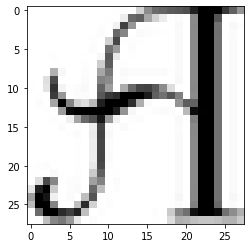

In [0]:
im1 = X_0_list_image[0]

import matplotlib.pyplot as plt
plt.imshow(im1, cmap='binary')
plt.show()

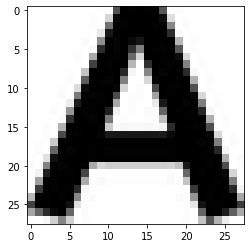

In [0]:
im2 = X_0_list_image[1]

import matplotlib.pyplot as plt
plt.imshow(im2, cmap='binary')
plt.show()

7/Faite comme dans la quetion précédante mais pour la classe 3. Conclure. 

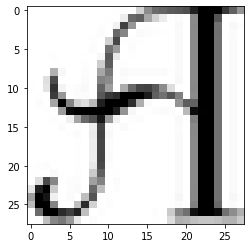

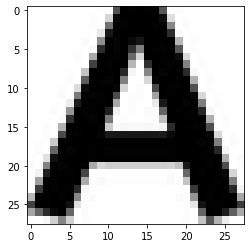

In [0]:
from sklearn.cluster import KMeans

kmean4 = KMeans(n_clusters=3,max_iter=20000,n_init=1000)
kmean4.fit(X_projbis)

Y_pred = kmean4.fit_predict(X_projbis)

import numpy as np



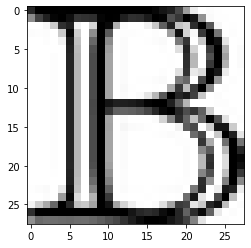

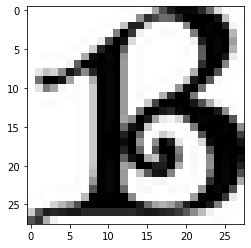

In [0]:

#ici on détecte les éléments yant pour label 0 
X_0 = X_image_vect[kmean4.labels_==1,:]
X_0_list = X_0.tolist()

#on reconstitue chaque matrice
X_0_list_image = [np.array(o).reshape(28,28) for o in X_0_list]

im1 = X_0_list_image[0]

import matplotlib.pyplot as plt
plt.imshow(im1, cmap='binary')
plt.show()


im2 = X_0_list_image[300]

import matplotlib.pyplot as plt
plt.imshow(im2, cmap='binary')
plt.show()



#on remarque qu'il y a moins d'erreurs dans la categorie  1 et 2
